# ***Assignment: Decision Tree Classification***

### Dataset: Heart Disease Prediction

## *About Dataset*

### *Context*

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.


### *Content*
*Attribute Information:*

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


# *PART A: Conceptual Questions*

### Q1) What is a Decision Tree and how does it make decisions?
    ans)  Decision Tree: A Decision Tree is a supervised ML model that makes decisions by recursively splitting data based on feature conditions, forming a tree of if–else rules until a prediction is made.

### Q2) What does a split criterion mean in a Decision Tree?
    ans) Split criterion: It is the metric used to decide the best feature and threshold to split the data at each node (e.g., Gini, Entropy), aiming to make child nodes purer.

### Q3) Difference between Gini Impurity and Entropy
    ans) Gini vs Entropy:
    Gini Impurity: Measures how often a random sample would be misclassified; faster to compute.
    Entropy: Measures uncertainty or information gain; more mathematically intensive.
    Both aim to create pure nodes and usually give similar results.

### Q4) Why do Decision Trees tend to overfit?
    ans) They can grow very deep and memorize noise in the training data, especially when not constrained.

### Q5) What role does the max_depth parameter play?
    ans) max_depth role: It limits how deep the tree can grow, helping control model complexity and reduce overfitting.

# *Part B: Data Exploration*


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.shape

(1025, 14)

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# *Part C: Data Preprocessing*


In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(['target'],axis=1)
y = data['target']


In [8]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((820, 13), (205, 13), (820,), (205,))

# *Part D: Model Building*


In [11]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier

DecisionTreeClassifier()

In [12]:
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred = dt_classifier.predict(X_test)

# *Part E: Model Evaluation*


In [14]:
from sklearn.metrics import accuracy_score
accuarcy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuarcy}')


Accuracy: 0.9853658536585366


In [15]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[102,   0],
       [  3, 100]])

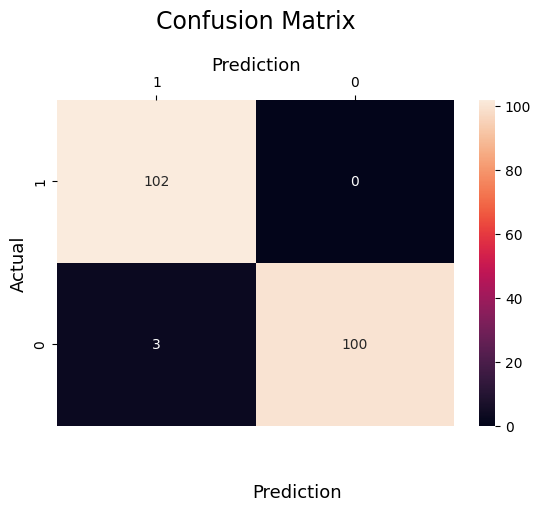

In [17]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['1','0'],
            yticklabels=['1','0']
            )
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



`By looking at the confusion matrix and classification reports we can that class 1 is predicted slightly better than class 0`


In [19]:
train_score = dt_classifier.score(X_train, y_train)
test_score = dt_classifier.score(X_test, y_test)

In [20]:
print(f'Train Score => {train_score}')
print(f'Test Score => {test_score}')

Train Score => 1.0
Test Score => 0.9853658536585366


`This shows that our model is not overfitting or underfitting as from the confusion matrix we can see that ouy model did not memorized the data`

# *Part F: Understanding Tree Depth (Manual Experiment)*


In [21]:
# Model 1 
model_1 = DecisionTreeClassifier(max_depth=2)
model_1

DecisionTreeClassifier(max_depth=2)

In [22]:
# trainning 
model_1.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2)

In [23]:
model_1.score(X_train,y_train)

0.7695121951219512

In [24]:
model_1_pred = model_1.predict(X_test)
model_1_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0])

In [25]:
model_1_accuracy = accuracy_score(y_true=y_test,y_pred=model_1_pred)
print(f'The Accuracy of model 1 is {model_1_accuracy * 100:.2f}%')

The Accuracy of model 1 is 67.80%


In [26]:
# model 2 

model_2 = DecisionTreeClassifier(max_depth=5)
model_2

DecisionTreeClassifier(max_depth=5)

In [27]:
model_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [28]:
model_2.score(X_train,y_train)

0.9292682926829269

In [29]:
model_2_pred = model_2.predict(X_test)
model_2_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0])

In [30]:
model_2_accuracy = accuracy_score(y_pred=model_2_pred,y_true=y_test)
print(f'The Accuracy of model 1 is {model_2_accuracy *100:.2f}%')

The Accuracy of model 1 is 84.39%


In [31]:
# Model 3 

model_3 = DecisionTreeClassifier(max_depth=None)

model_3

DecisionTreeClassifier()

In [32]:
model_3.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
model_3.score(X_train,y_train)

1.0

In [34]:
model_3_pred = model_3.predict(X_test)
model_3_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [35]:
model_3_accuracy = accuracy_score(y_pred=model_3_pred,y_true=y_test)
print(f'The Accuracy of model 1 is {model_3_accuracy *100:.2f}%')

The Accuracy of model 1 is 98.54%


# **_What happens when the tree is very shallow?_**

  ### A very shallow tree underfits the data because it cannot capture complex patterns, leading to low training and test accuracy.


# **_What happens when the tree is very deep?_**

###    A very deep tree can fit the training data extremely well but often overfits, resulting in poor generalization to unseen data.


# **_Which model performs best and why?_**

### Model 3 performs best because it achieves the highest performance on the validation/test data, indicating a good balance between learning complex patterns and avoiding overfitting, rather than simply having the greatest model capacity.



# **Part G: Tree Visualization**


In [36]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text


text_representation = export_text(model_3)
print(text_representation)


|--- feature_2 <= 0.50
|   |--- feature_11 <= 0.50
|   |   |--- feature_12 <= 2.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_7 <= 96.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  96.50
|   |   |   |   |   |--- feature_4 <= 316.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  316.50
|   |   |   |   |   |   |--- feature_3 <= 135.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  135.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- feature_7 <= 146.00
|   |   |   |   |   |--- feature_3 <= 115.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  115.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  146.00
|   |   |   |   |   |--- feature_9 <= 0.80
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_9 >  0.80
|   |   |   |   |   |   |--- feature_6 <= 0.50
|   

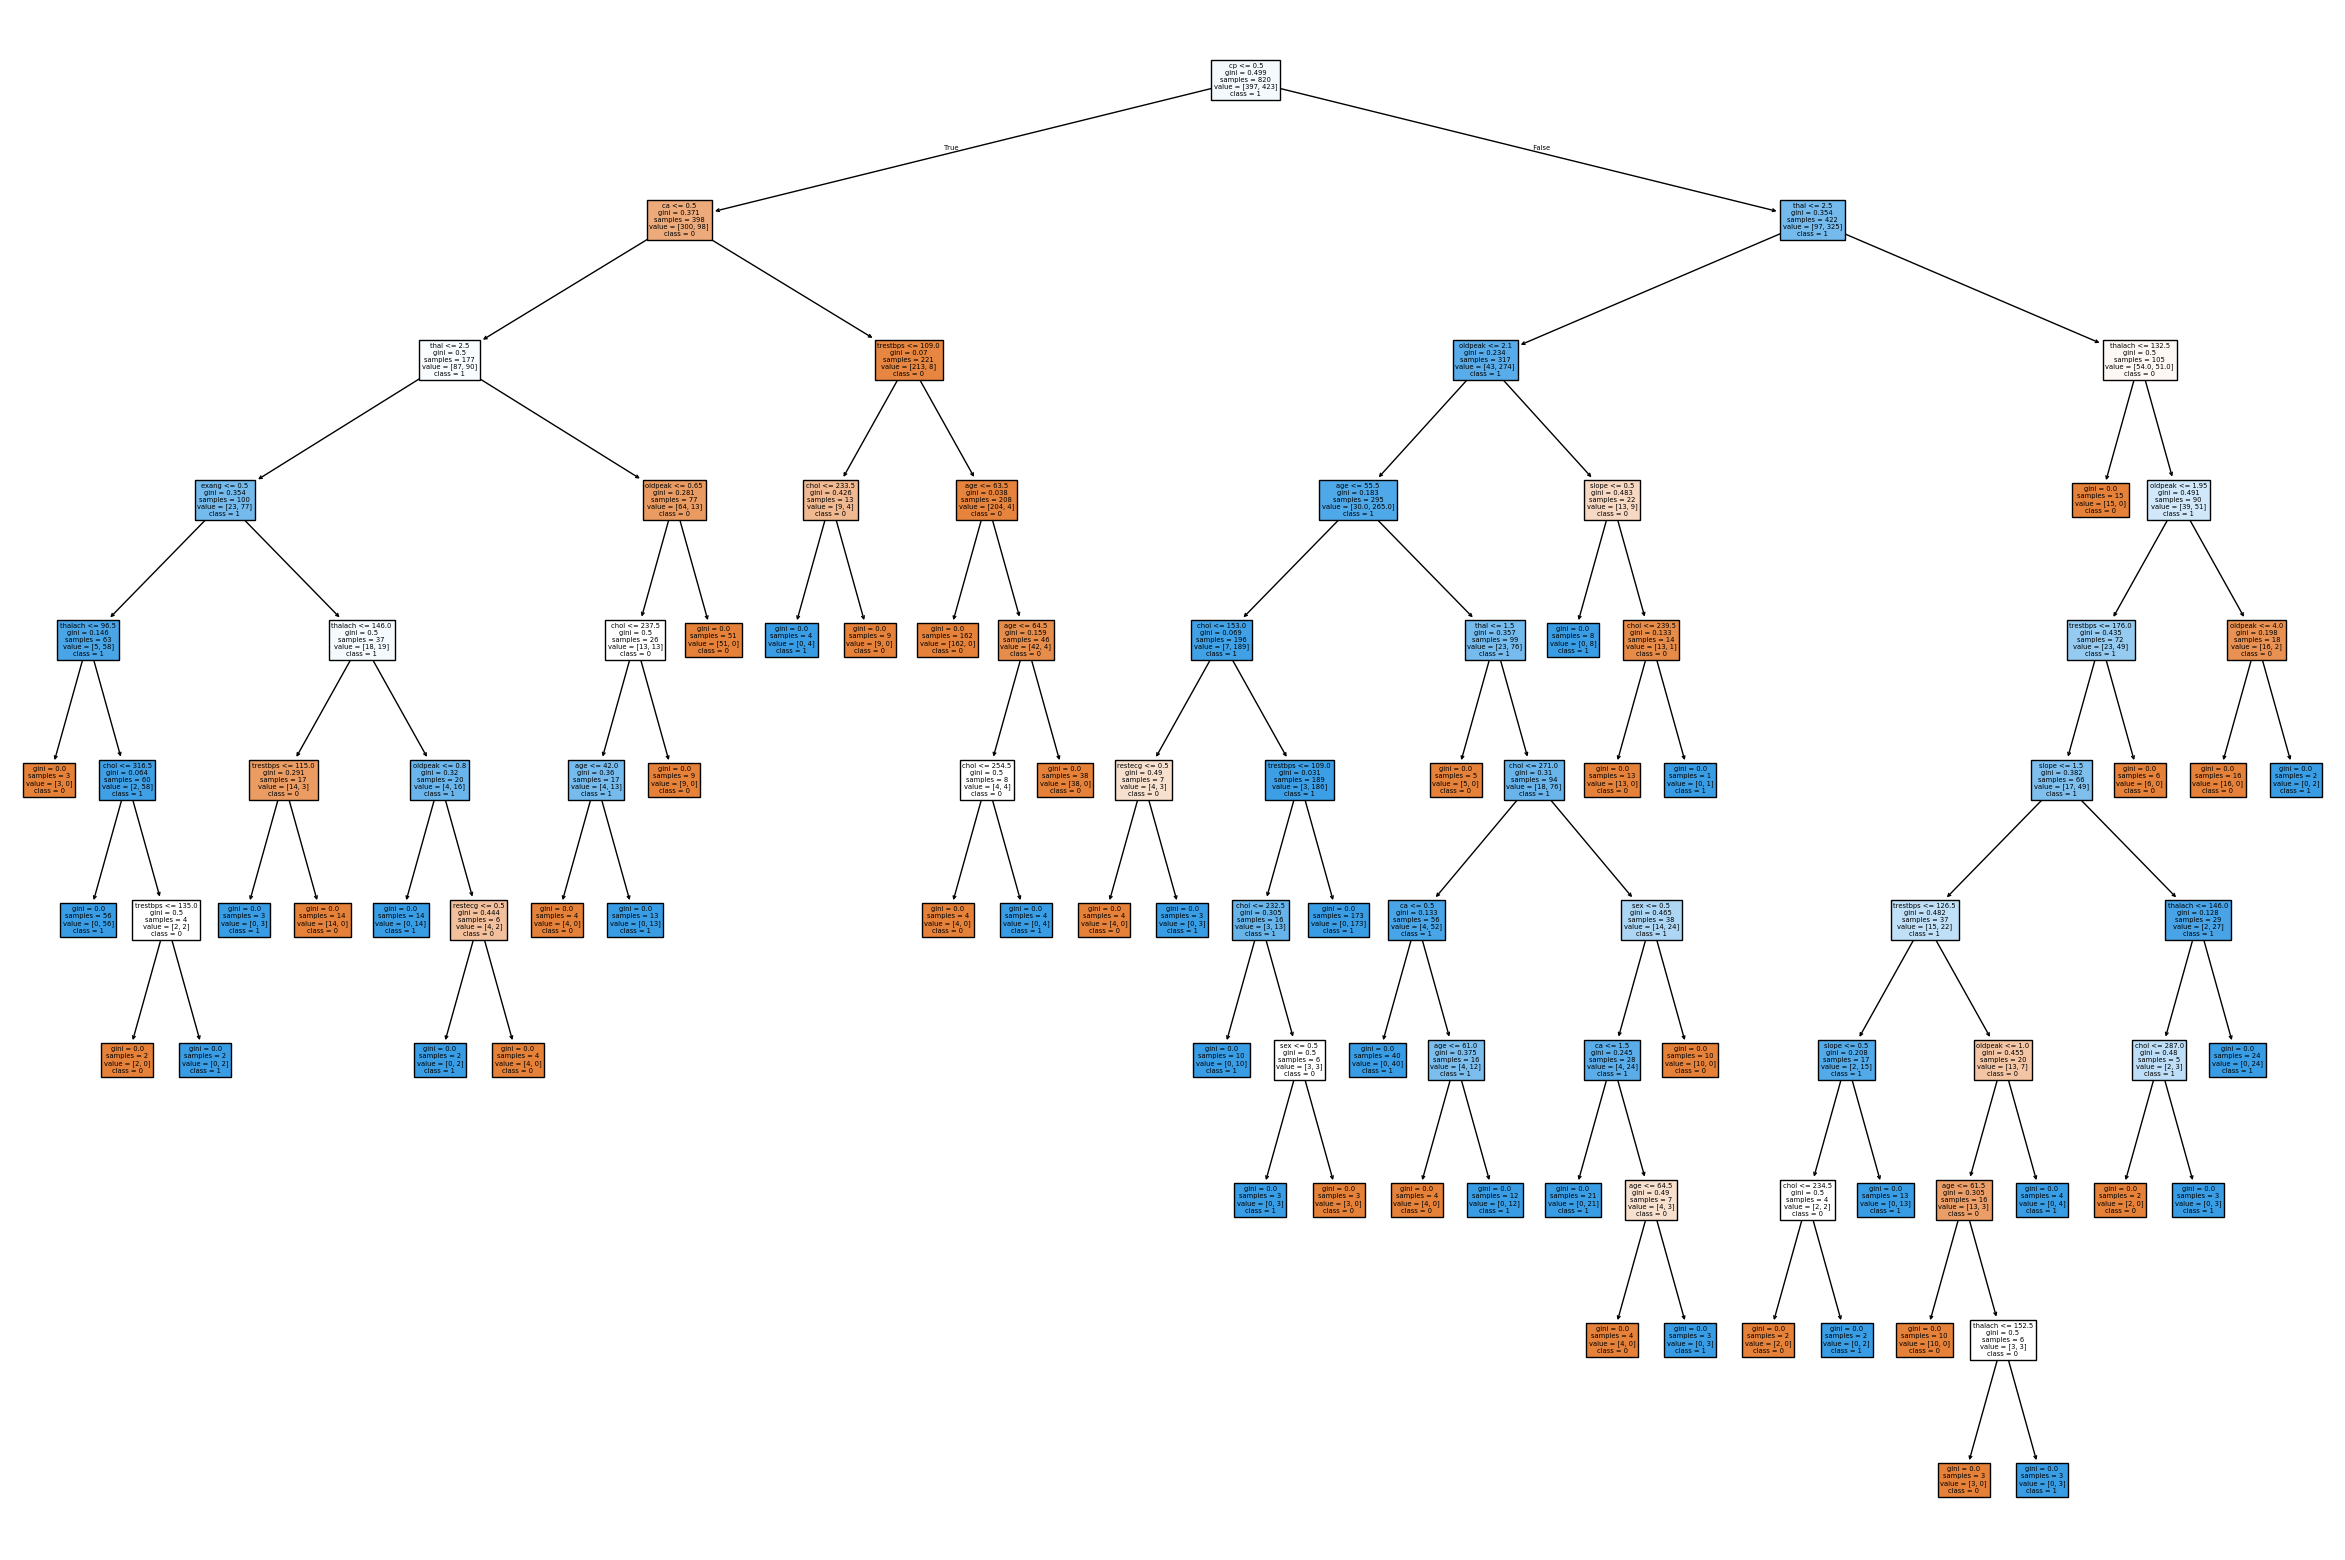

In [37]:
fig = plt.figure(figsize=(30,20))
tp = plot_tree(model_3,feature_names=X.columns , class_names=[str(c) for c in model_3.classes_],filled=True)


# **Part H: Reflection Questions**



## *_Why are Decision Trees suitable for medical datasets?_*

    ANS) Decision Trees are great for medical data because they're easy to understand, visually represent complex diagnoses (like a flowchart), handle different data types, capture complex interactions between factors (age, symptoms, labs), identify key risk factors for targeted interventions, and support clinical decision-making by showing why a diagnosis is made, making them transparent tools for physicians. 

    Key reasons they are suitable:
        
**Interpretability & Transparency :** They create a tree-like structure (a visual flowchart) that physicians can easily follow to understand how a                                diagnosis or prediction was reached, unlike "black box" models.
**Clinical Relevance :** They map symptoms (like age, blood pressure, lab results) to outcomes (disease/no disease), directly mimicking clinical reasoning.

**Identify Key Factors :** They highlight crucial variables (e.g., high glucose, specific symptoms) that drive decisions, helping identify high-risk groups for prevention.

**Handle Complex Interactions :** They excel at finding non-linear relationships and complex interactions between multiple risk factors that traditional regression models might miss.

**Support Decision-Making :** They act as powerful clinical decision support tools, assisting in tasks like disease diagnosis (e.g., cancer, heart disease), risk assessment, and treatment planning.

**Versatility :** They work well with mixed data (numerical like age/BP, categorical like sex) and can predict outcomes like disease presence or treatment effectiveness. 


# *_What makes Decision Trees easy to interpret?_*

    ANS) Decision trees are easy to interpret due to their intuitive, flowchart-like structure that mimics human thinking, allowing for a clear visualization of the step-by-step decision process, showing which features are important and how rules combine to reach a conclusion, making them highly transparent for non-technical stakeholders

    Here's why they are so interpretable:

    Visual Representation: They are graphical, resembling a tree with nodes and branches, making the logic easy to follow.
        Human-Like Logic: The sequential, conditional rules (if-then statements) closely mirror how people make decisions, as noted by a Medium article and 365 Data Science.

    Clear Feature Importance: The tree structure inherently shows which attributes (features) are most influential at different decision points,    as stated by IBM and Lyzr AI.

    Simple Boolean Rules: Each path from the root to a leaf node forms a simple, understandable rule (e.g., "If Age < 30 AND Income > $50k, then Approve Loan").




# *_Why are Decision Trees commonly used in ensemble methods?_*

    ANS) Decision Trees are perfect for ensembles because they are simple, fast to train, and versatile, but prone to overfitting (high variance), which ensembles like Random Forests and Boosting fix by combining many trees to average out errors and create more robust, accurate models, leveraging the "wisdom of the crowd" for better generalization. 

    Why Decision Trees are Good Building Blocks:
    
    Interpretability & Simplicity: Individual trees are easy to understand, providing a visual decision path, which helps in understanding the ensemble's logic.
    
    Efficiency: They are relatively quick to train, making it feasible to build hundreds or thousands of them for an ensemble.
    
    Handles Diverse Data: They manage different data types (numerical, categorical) and don't require feature scaling.
    
    Captures Non-Linearity: They can model complex, non-linear relationships in data effectively. 



# **_Comparing criterion='gini' vs criterion='entropy'_**



## *🔹 Gini Impurity*

Measures the probability of incorrectly classifying a randomly chosen sample

Formula is computationally simple

Tends to create slightly purer child nodes faster

### Pros

    Faster to compute

    Often preferred for large datasets

### Cons

Slightly less informative in edge cases

## *🔹 Entropy (Information Gain)*

Measures the amount of disorder in the data

Based on information theory

Encourages splits that provide maximum information gain

### Pros

    More theoretically grounded

    Can produce more balanced trees

### Cons

    Computationally heavier (log calculations)

In [53]:
# model with GINI

model_gini = DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=4)

model_gini

DecisionTreeClassifier(max_depth=4, random_state=42)

In [54]:
model_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [55]:
gini_pred = model_gini.predict(X_test)
gini_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0])

In [56]:
gini_accuracy = accuracy_score(y_true=y_test,y_pred=gini_pred)
print(gini_accuracy)

0.8


In [58]:
# Model with entropy criterion

model_entropy = DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=4)
model_entropy

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [59]:
model_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [60]:
entropy_pred = model_entropy.predict(X_test)
entropy_pred


array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0])

In [61]:
entropy_accuracy = accuracy_score(y_true=y_test,y_pred=entropy_pred)
print(entropy_accuracy)

0.7902439024390244


In [64]:
print('Gini Tree Depth:' ,model_gini.get_depth())
print("Gini Leaf Nodes:", model_gini.get_n_leaves())


Gini Tree Depth: 4
Gini Leaf Nodes: 15


In [65]:
print('Entropy Tree Depth:',model_entropy.get_depth())
print("Entropy Leaf Nodes:", model_entropy.get_n_leaves())

Entropy Tree Depth: 4
Entropy Leaf Nodes: 13


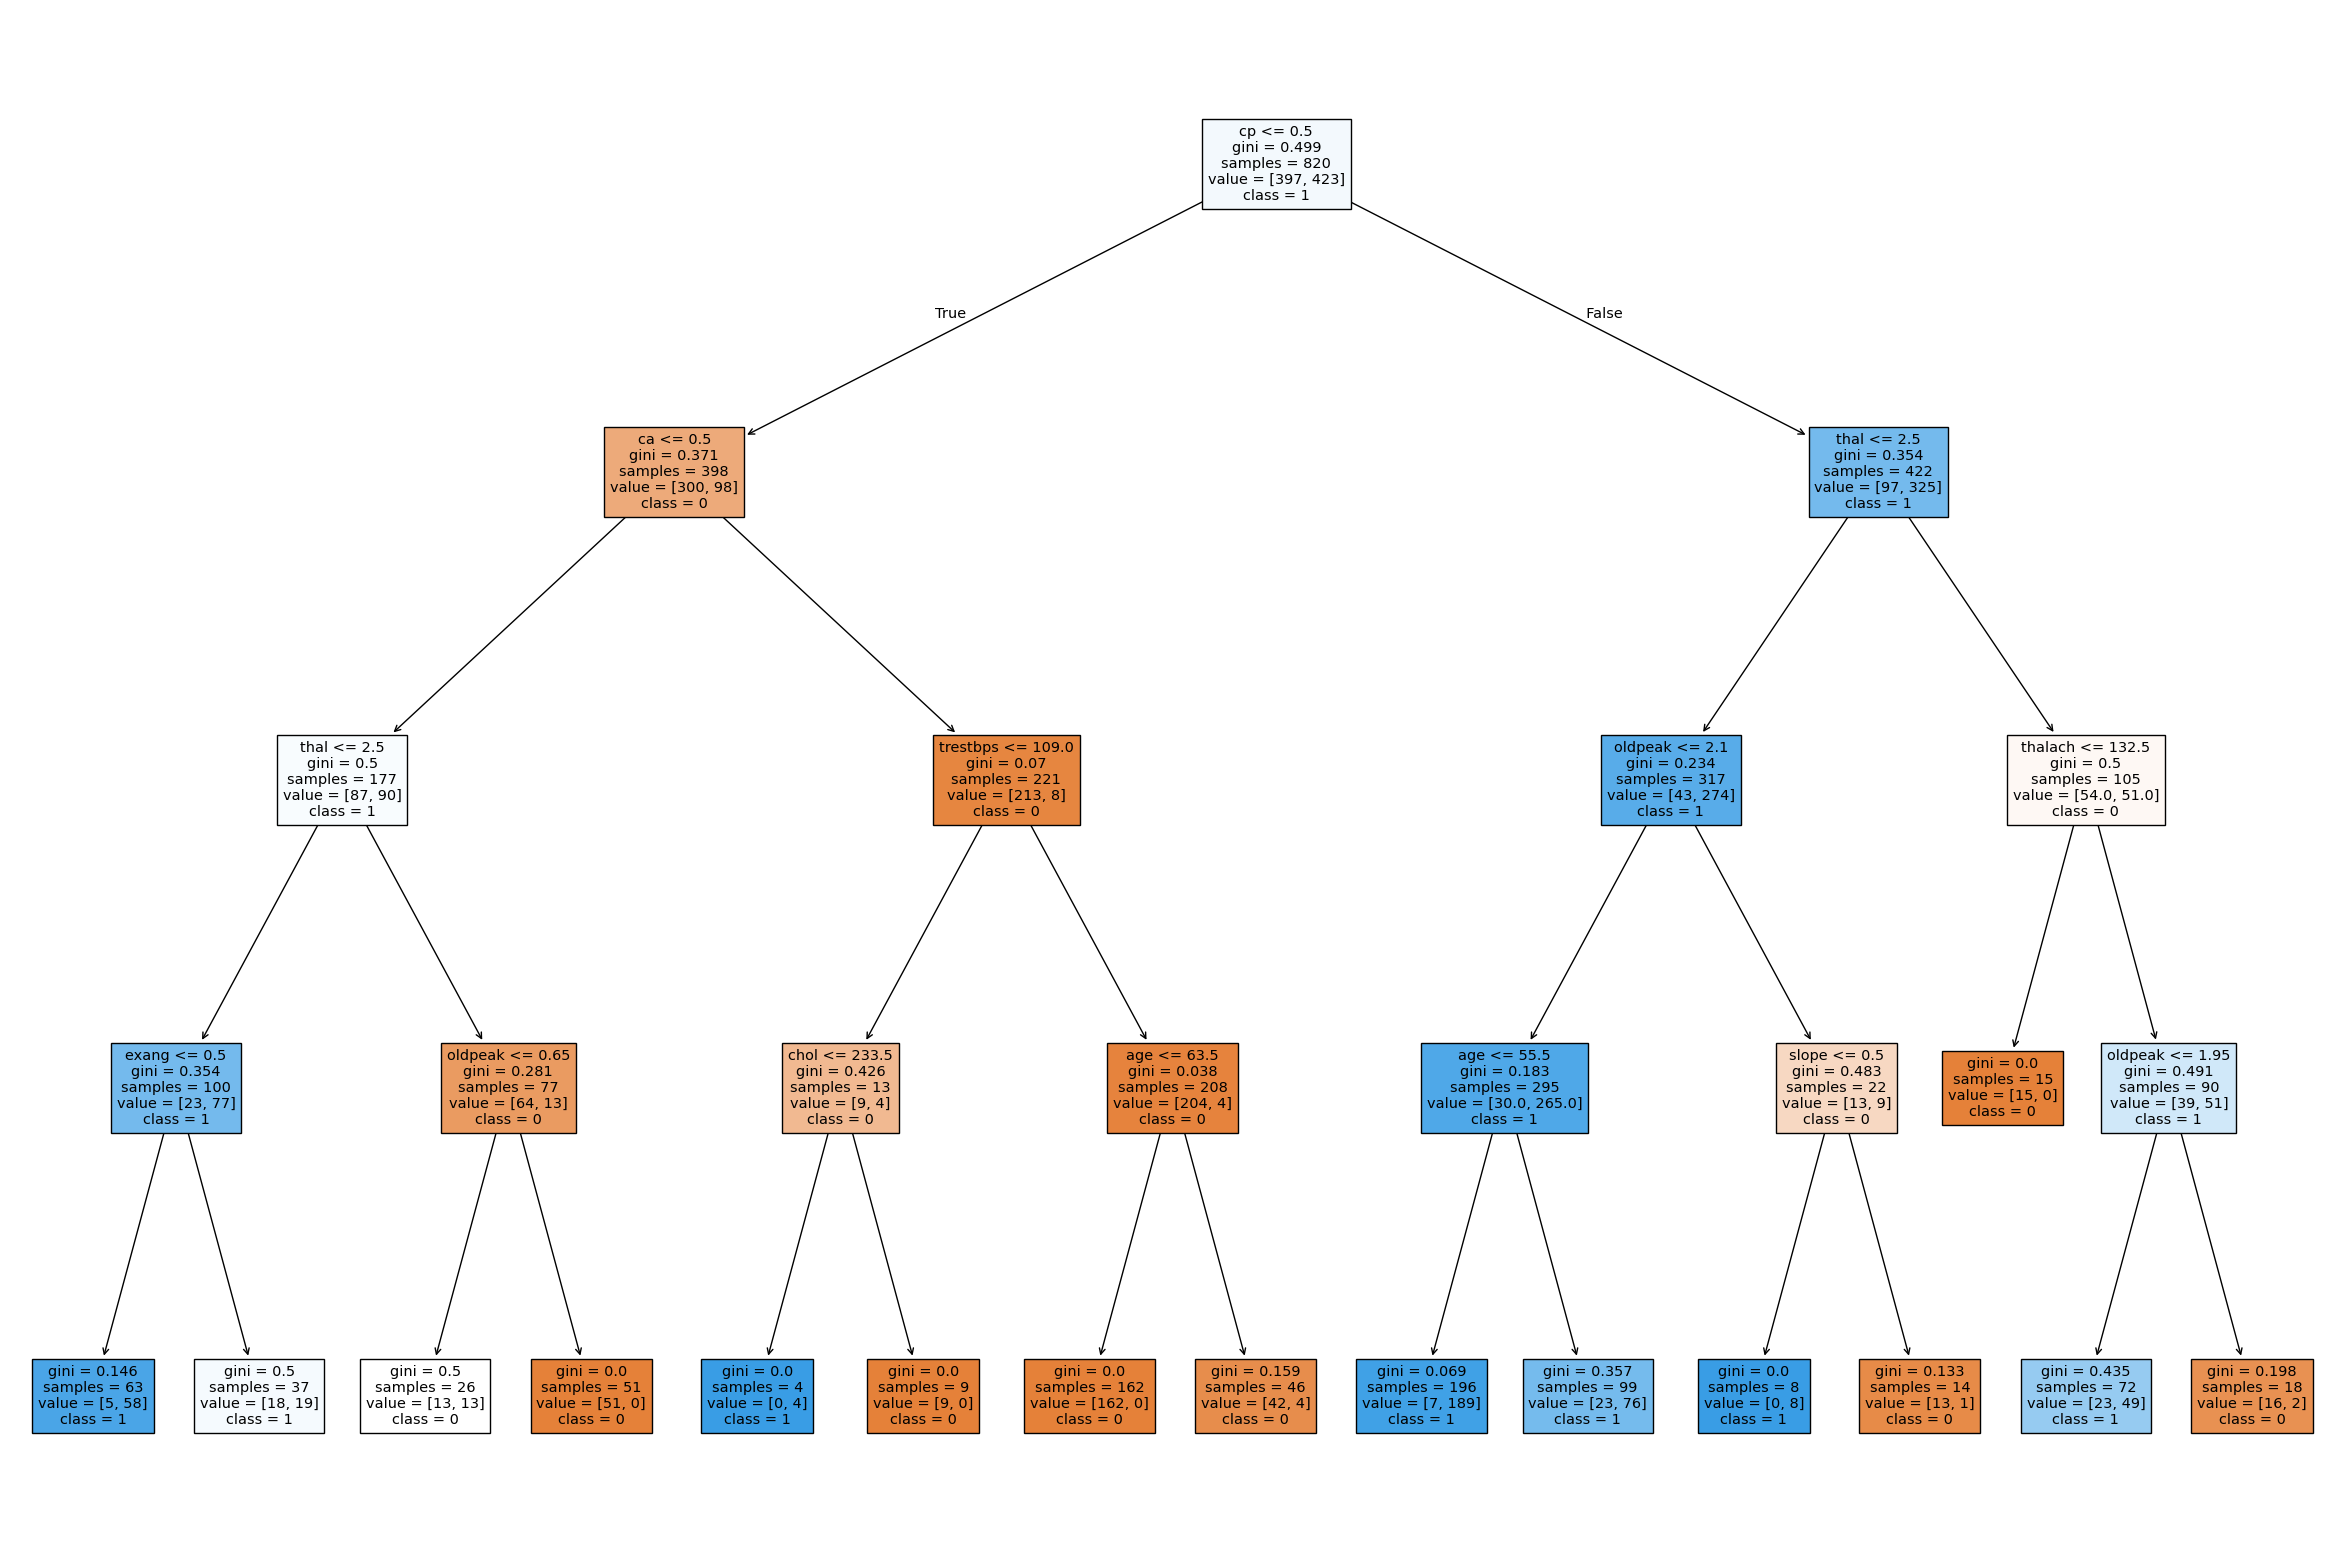

In [69]:
fig = plt.figure(figsize=(30,20))

tp = plot_tree(model_gini,feature_names=X.columns , class_names=[str(c) for c in model_3.classes_],filled=True)

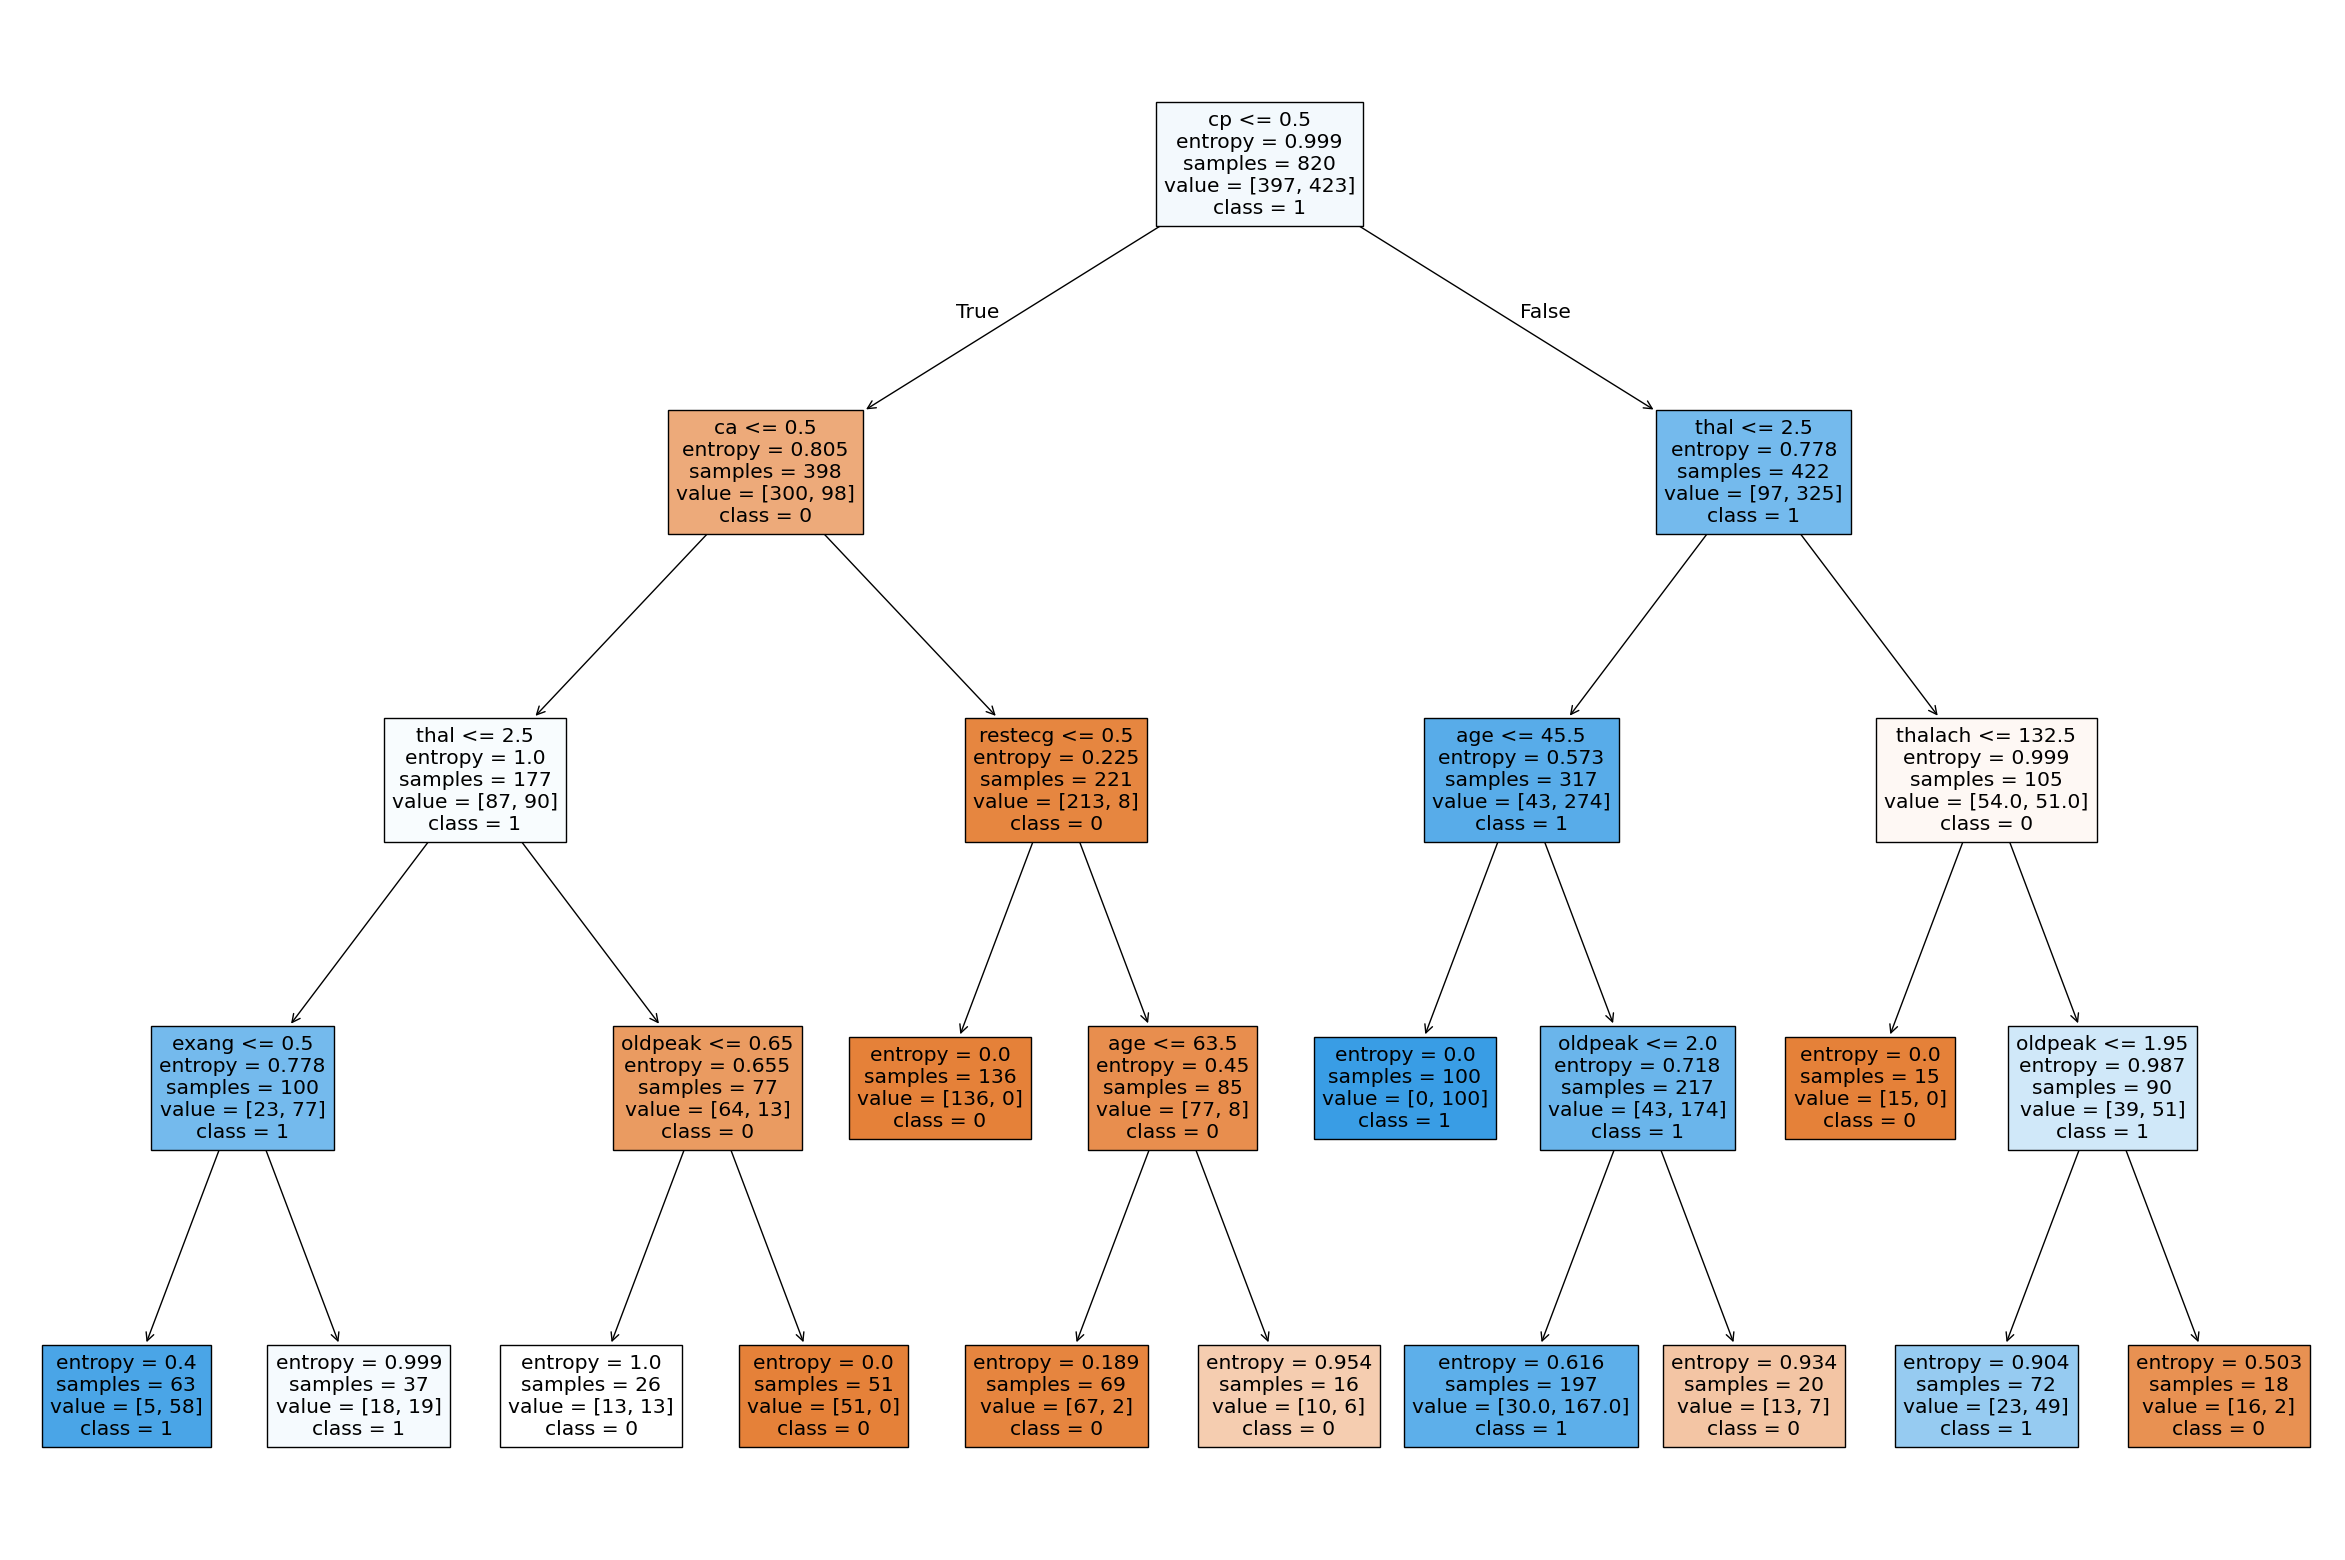

In [67]:
fig = plt.figure(figsize=(30,20))
tp = plot_tree(model_entropy,feature_names=X.columns , class_names=[str(c) for c in model_3.classes_],filled=True)

# **_Trying min_samples_leaf manually_**

In [70]:


leaf_sizes = [1, 5, 10, 20, 50]

for leaf in leaf_sizes:
    dt = DecisionTreeClassifier(
        criterion="gini",
        min_samples_leaf=leaf,
        random_state=42
    )
    
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    
    print(f"min_samples_leaf={leaf} → Accuracy: {acc:.4f}")


min_samples_leaf=1 → Accuracy: 0.9854
min_samples_leaf=5 → Accuracy: 0.8976
min_samples_leaf=10 → Accuracy: 0.8585
min_samples_leaf=20 → Accuracy: 0.7951
min_samples_leaf=50 → Accuracy: 0.7707


# Conclusion

Decision Trees are powerful yet fragile models that require careful control of complexity. In this project, tuning min_samples_leaf proved to be an effective way to balance bias and variance. While the choice of split criterion (Gini vs Entropy) had minimal impact on performance, controlling leaf size significantly improved generalization.

This highlights an important insight: model regularization parameters often matter more than algorithmic choices. Proper tuning of min_samples_leaf leads to simpler, more robust trees that perform better on unseen data.